<a href="https://colab.research.google.com/github/abdallah388687/Deep-Learning/blob/main/Assignment_3___Abddallah_Mohammed_Ahmed_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
from keras import layers
from keras import models
import numpy as np

Load cifar10 dataset and check the shape of train and test sets

In [ ]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


Now we divide the train dataset into train and validation

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, stratify = y_train, random_state=42)

In [ ]:
print("x_Train set shape: ", x_train.shape)
print("x_Valid set shape: ", x_valid.shape)
print("y_Train set shape: ", y_train.shape)
print("y_Valid set shape: ", y_valid.shape)

x_Train set shape:  (40000, 32, 32, 3)
x_Valid set shape:  (10000, 32, 32, 3)
y_Train set shape:  (40000, 1)
y_Valid set shape:  (10000, 1)


In [ ]:
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-3),
              metrics=['acc'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_datagen.fit(x_train)

valid_datagen.fit(x_valid)

train_generator = train_datagen.flow(
        x = x_train,
        y = y_train,
        batch_size=128)

validation_generator = valid_datagen.flow(x = x_valid, y = y_valid, batch_size=128)

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch= x_train.shape[0] / 128 ,
      epochs=30,
      validation_data = validation_generator,
      validation_steps= x_valid.shape[0] / 128 )

Epoch 1/30
312/312 [==============================] - 4s 12ms/step - loss: 1.7444 - acc: 0.3411 - val_loss: 1.4819 - val_acc: 0.4493
Epoch 2/30
312/312 [==============================] - 3s 11ms/step - loss: 1.3688 - acc: 0.4972 - val_loss: 1.2735 - val_acc: 0.5333
Epoch 3/30
312/312 [==============================] - 3s 11ms/step - loss: 1.2027 - acc: 0.5662 - val_loss: 1.1501 - val_acc: 0.5851
Epoch 4/30
312/312 [==============================] - 3s 11ms/step - loss: 1.0782 - acc: 0.6137 - val_loss: 1.0766 - val_acc: 0.6195
Epoch 5/30
312/312 [==============================] - 3s 11ms/step - loss: 0.9742 - acc: 0.6556 - val_loss: 1.0644 - val_acc: 0.6247
Epoch 6/30
312/312 [==============================] - 4s 13ms/step - loss: 0.8914 - acc: 0.6848 - val_loss: 0.9624 - val_acc: 0.6643
Epoch 7/30
312/312 [==============================] - 3s 11ms/step - loss: 0.8292 - acc: 0.7075 - val_loss: 0.9758 - val_acc: 0.6559
Epoch 8/30
312/312 [==============================] - 3s 11ms/step - 

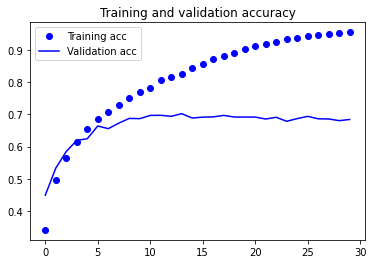

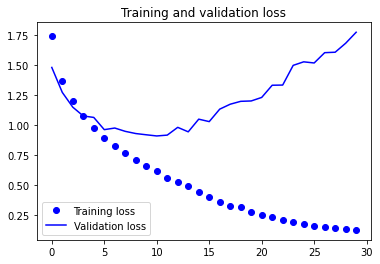

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## With Data Augmentation

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Note that the validation data should not be augmented!
valid_datagen = ImageDataGenerator(rescale=1./255)

train_datagen.fit(x_train)

valid_datagen.fit(x_valid)


train_generator = train_datagen.flow(
        x = x_train,
        y = y_train,
        batch_size=128)

validation_generator = valid_datagen.flow(x = x_valid, y = y_valid, batch_size=128)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=1e-3), metrics=['acc'])

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch= x_train.shape[0] / 128,
      epochs=30,
      validation_data= validation_generator,
      validation_steps= x_valid.shape[0] / 128)

Epoch 1/30
312/312 [==============================] - 23s 70ms/step - loss: 1.9757 - acc: 0.2535 - val_loss: 1.7615 - val_acc: 0.3405
Epoch 2/30
312/312 [==============================] - 21s 68ms/step - loss: 1.7330 - acc: 0.3558 - val_loss: 1.5072 - val_acc: 0.4442
Epoch 3/30
312/312 [==============================] - 21s 69ms/step - loss: 1.6192 - acc: 0.4010 - val_loss: 1.3512 - val_acc: 0.5070
Epoch 4/30
312/312 [==============================] - 21s 68ms/step - loss: 1.5345 - acc: 0.4401 - val_loss: 1.3176 - val_acc: 0.5238
Epoch 5/30
312/312 [==============================] - 22s 72ms/step - loss: 1.4713 - acc: 0.4654 - val_loss: 1.2280 - val_acc: 0.5566
Epoch 6/30
312/312 [==============================] - 21s 68ms/step - loss: 1.4235 - acc: 0.4872 - val_loss: 1.2349 - val_acc: 0.5585
Epoch 7/30
312/312 [==============================] - 21s 68ms/step - loss: 1.3825 - acc: 0.5034 - val_loss: 1.3488 - val_acc: 0.5328
Epoch 8/30
312/312 [==============================] - 21s 67ms

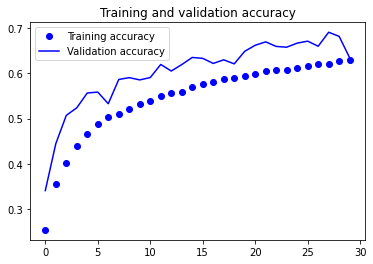

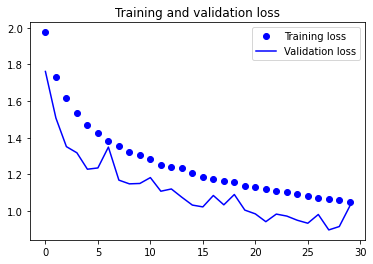

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Transfer Learning part

In [ ]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
datagen = ImageDataGenerator(rescale= 1./255)
batch_size = 32

def extract_features(x, y, sample_count):
    features = np.zeros(shape=(sample_count, 1, 1, 512))
    labels = np.zeros(shape=(sample_count,10))
    generator = datagen.flow(
        x = x,
        y = y,
        batch_size=batch_size)
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

In [ ]:
train_features, train_labels = extract_features(x_train, y_train, 40000)
valid_features, valid_labels = extract_features(x_valid, y_valid, 10000)

In [ ]:
train_features = np.reshape(train_features, (40000, 1 * 1 * 512))
valid_features = np.reshape(valid_features, (10000, 1 * 1 * 512))

In [ ]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim= 1 * 1 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-3),
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(valid_features, valid_labels))

Epoch 1/30
2000/2000 [==============================] - 7s 4ms/step - loss: 1.5370 - acc: 0.4529 - val_loss: 1.3093 - val_acc: 0.5454
Epoch 2/30
2000/2000 [==============================] - 6s 3ms/step - loss: 1.3463 - acc: 0.5294 - val_loss: 1.2345 - val_acc: 0.5755
Epoch 3/30
2000/2000 [==============================] - 8s 4ms/step - loss: 1.2947 - acc: 0.5459 - val_loss: 1.2185 - val_acc: 0.5779
Epoch 4/30
2000/2000 [==============================] - 6s 3ms/step - loss: 1.2536 - acc: 0.5641 - val_loss: 1.1843 - val_acc: 0.5914
Epoch 5/30
2000/2000 [==============================] - 7s 3ms/step - loss: 1.2222 - acc: 0.5735 - val_loss: 1.1850 - val_acc: 0.5911
Epoch 6/30
2000/2000 [==============================] - 7s 4ms/step - loss: 1.1968 - acc: 0.5810 - val_loss: 1.1710 - val_acc: 0.5999
Epoch 7/30
2000/2000 [==============================] - 8s 4ms/step - loss: 1.1689 - acc: 0.5914 - val_loss: 1.1798 - val_acc: 0.5945
Epoch 8/30
2000/2000 [==============================] - 7s 3ms

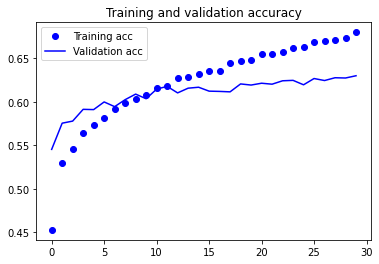

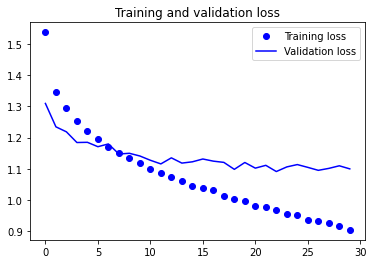

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', input_dim= 1 * 1 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 512)               0         
                                                                 
 dense_25 (Dense)            (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_26 (Dense)            (None, 512)               262656    
                                                                 
 dense_27 (Dense)            (None, 256)               131328    
                                                                 
 dense_28 (Dense)            (None, 128)              

In [ ]:
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 38


In [ ]:
conv_base.trainable = False

In [ ]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 12


In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(
        x= x_train,
        y = y_train,
        batch_size=32)

validation_generator = valid_datagen.flow(
        x= x_valid,
        y= y_valid,
        batch_size=32)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-3),
              metrics=['acc'])

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch= x_train.shape[0]/ 32,
      epochs=30,
      validation_data=validation_generator,
      validation_steps= x_valid.shape[0]/ 32,
      verbose=2)

Epoch 1/30
1250/1250 - 29s - loss: 1.7892 - acc: 0.3521 - val_loss: 1.4665 - val_acc: 0.4763 - 29s/epoch - 23ms/step
Epoch 2/30
1250/1250 - 28s - loss: 1.6355 - acc: 0.4208 - val_loss: 1.4703 - val_acc: 0.4850 - 28s/epoch - 22ms/step
Epoch 3/30
1250/1250 - 28s - loss: 1.5876 - acc: 0.4407 - val_loss: 1.3917 - val_acc: 0.5084 - 28s/epoch - 22ms/step
Epoch 4/30
1250/1250 - 28s - loss: 1.5650 - acc: 0.4478 - val_loss: 1.3759 - val_acc: 0.5113 - 28s/epoch - 22ms/step
Epoch 5/30
1250/1250 - 27s - loss: 1.5407 - acc: 0.4586 - val_loss: 1.3623 - val_acc: 0.5138 - 27s/epoch - 22ms/step
Epoch 6/30
1250/1250 - 27s - loss: 1.5334 - acc: 0.4603 - val_loss: 1.3388 - val_acc: 0.5365 - 27s/epoch - 22ms/step
Epoch 7/30
1250/1250 - 27s - loss: 1.5151 - acc: 0.4670 - val_loss: 1.3057 - val_acc: 0.5469 - 27s/epoch - 22ms/step
Epoch 8/30
1250/1250 - 27s - loss: 1.5039 - acc: 0.4664 - val_loss: 1.2926 - val_acc: 0.5452 - 27s/epoch - 22ms/step
Epoch 9/30
1250/1250 - 27s - loss: 1.4954 - acc: 0.4728 - val_lo

In [ ]:
model.save('cifar10_model.h5')

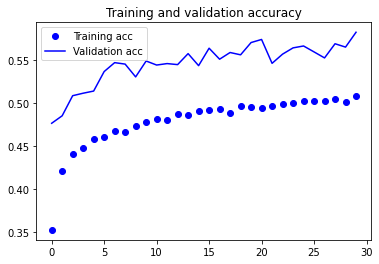

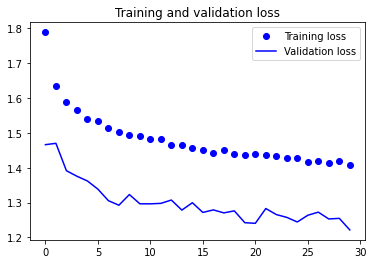

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-3),
              metrics=['acc'])
history = model.fit(
      train_generator,
      steps_per_epoch= x_train.shape[0]/ 32,
      epochs=30,
      validation_data=validation_generator,
      validation_steps= x_valid.shape[0]/ 32,
      verbose=2)

Epoch 1/30
1250/1250 - 32s - loss: 1.7772 - acc: 0.3575 - val_loss: 1.2870 - val_acc: 0.5574 - 32s/epoch - 25ms/step
Epoch 2/30
1250/1250 - 32s - loss: 1.4351 - acc: 0.5014 - val_loss: 1.1599 - val_acc: 0.5969 - 32s/epoch - 25ms/step
Epoch 3/30
1250/1250 - 31s - loss: 1.3580 - acc: 0.5349 - val_loss: 1.1045 - val_acc: 0.6166 - 31s/epoch - 25ms/step
Epoch 4/30
1250/1250 - 31s - loss: 1.3092 - acc: 0.5596 - val_loss: 1.1428 - val_acc: 0.6162 - 31s/epoch - 25ms/step
Epoch 5/30
1250/1250 - 31s - loss: 1.2841 - acc: 0.5657 - val_loss: 1.0976 - val_acc: 0.6309 - 31s/epoch - 25ms/step
Epoch 6/30
1250/1250 - 31s - loss: 1.2463 - acc: 0.5770 - val_loss: 1.0750 - val_acc: 0.6353 - 31s/epoch - 25ms/step
Epoch 7/30
1250/1250 - 31s - loss: 1.2376 - acc: 0.5796 - val_loss: 1.0827 - val_acc: 0.6314 - 31s/epoch - 25ms/step
Epoch 8/30
1250/1250 - 31s - loss: 1.2204 - acc: 0.5870 - val_loss: 1.0005 - val_acc: 0.6616 - 31s/epoch - 25ms/step
Epoch 9/30
1250/1250 - 31s - loss: 1.2181 - acc: 0.5903 - val_lo

In [ ]:
model.save('cifar10_2.h5')

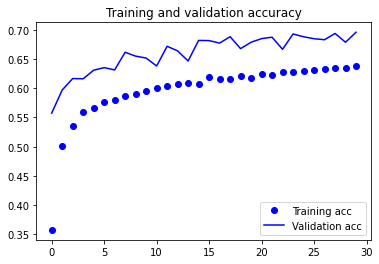

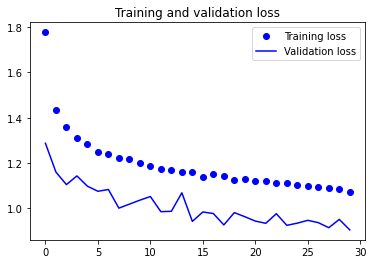

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

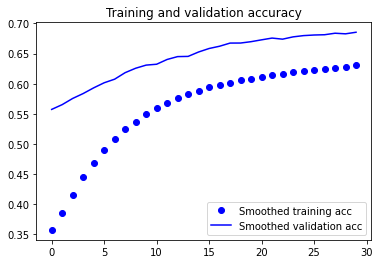

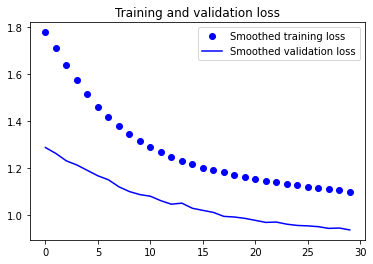

In [ ]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()